# Assignment - 3 (Deep Learning)
### Created by Akash Bhardwaj

#### >>Importing the libraries and packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Activation

Using TensorFlow backend.


#### >>To load the Dataset

In [2]:
data_x=pd.read_pickle('trainX.pickle')
data_y=pd.read_pickle('trainY.pickle')

In [3]:
np.unique(data_y)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [4]:
print(data_x.shape,data_y.shape)

(60000, 28, 28) (60000,)


In [5]:
img_rows,img_cols=28,28

#### >>Splitting of Dataset

In [6]:
x_train=data_x[:40000]
x_valid=data_x[40000:50000]
x_test=data_x[50000:]
y_train=data_y[:40000]
y_valid=data_y[40000:50000]
y_test=data_y[50000:]

#### >>Reshaping of Dataset(train, test and valid)

In [7]:
x_train=x_train.reshape(x_train.shape[0],img_rows,img_cols,1)
x_valid=x_valid.reshape(x_valid.shape[0],img_rows,img_cols,1)
x_test=x_test.reshape(x_test.shape[0],img_rows,img_cols,1)
input_shape=(img_rows,img_rows,1)
input_shape

(28, 28, 1)

#### >>Defining of batch_size, number of classes and epochs

In [8]:
batch_size=128
num_classes=10
epochs=100

#### >>Normalization of Dataset

In [9]:
x_train=x_train.astype('float32')
x_valid=x_valid.astype('float32')
x_test=x_test.astype('float32')
x_train/=255
x_valid/=255
x_test/=255
print('x_train shape',x_train.shape)
print('x_train shape',x_valid.shape)
print('x_train shape',x_test.shape)
print(x_train.shape[0],'train samples')
print(x_valid.shape[0],'valid samples')
print(x_test.shape[0],'test samples')

y_train=keras.utils.to_categorical(y_train,num_classes)
y_valid=keras.utils.to_categorical(y_valid,num_classes)
y_test=keras.utils.to_categorical(y_test,num_classes)

x_train shape (40000, 28, 28, 1)
x_train shape (10000, 28, 28, 1)
x_train shape (10000, 28, 28, 1)
40000 train samples
10000 valid samples
10000 test samples


In [11]:
x_train=np.reshape(x_train,(40000,784))
x_valid=np.reshape(x_valid,(10000,784))
x_test=np.reshape(x_test,(10000,784))

#### >>Create the model

In [15]:
model=Sequential()
model.add(Dense(500,input_dim=784),)
model.add(Activation('relu'))

model.add(Dense(300))
model.add(Activation('relu'))

model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 500)               392500    
_________________________________________________________________
activation_7 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 300)               150300    
_________________________________________________________________
activation_8 (Activation)    (None, 300)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                3010      
_________________________________________________________________
activation_9 (Activation)    (None, 10)                0         
Total params: 545,810
Trainable params: 545,810
Non-trainable params: 0
_________________________________________________________________


#### >>Fitting up of model(training)

In [16]:
history = model.fit(x_train,y_train,batch_size=batch_size,epochs=100,verbose=1,validation_data=(x_valid,y_valid))

score=model.evaluate(x_test,y_test,verbose=0)
print('Test loss: ',score[0])
print('Test accuracy: ',score[1])

Train on 40000 samples, validate on 10000 samples
Epoch 1/100
40000/40000 [==============================] - 11s 281us/step - loss: 0.6177 - acc: 0.7730 - val_loss: 0.5381 - val_acc: 0.7970
Epoch 2/100
40000/40000 [==============================] - 10s 261us/step - loss: 0.4171 - acc: 0.8450 - val_loss: 0.3759 - val_acc: 0.8653
Epoch 3/100
40000/40000 [==============================] - 10s 262us/step - loss: 0.3644 - acc: 0.8643 - val_loss: 0.3574 - val_acc: 0.8659
Epoch 4/100
40000/40000 [==============================] - 11s 266us/step - loss: 0.3327 - acc: 0.8751 - val_loss: 0.3523 - val_acc: 0.8650
Epoch 5/100
40000/40000 [==============================] - 11s 263us/step - loss: 0.3129 - acc: 0.8832 - val_loss: 0.3589 - val_acc: 0.8708
Epoch 6/100
40000/40000 [==============================] - 10s 243us/step - loss: 0.2913 - acc: 0.8913 - val_loss: 0.3466 - val_acc: 0.8733
Epoch 7/100
40000/40000 [==============================] - 10s 247us/step - loss: 0.2760 - acc: 0.8966 - val_l

#### >>Visualization of Accuracy and loss

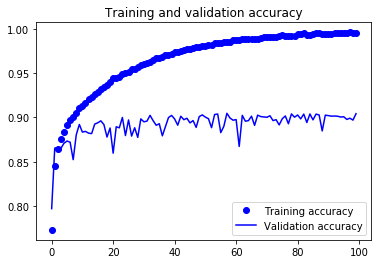

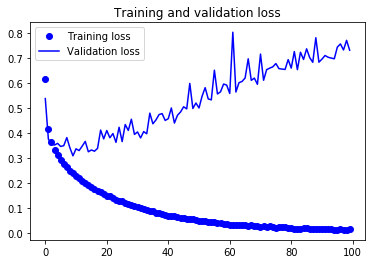

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

## Applying the CNN (Convolution Neural Network) model

#### >>To load the Dataset

In [18]:
data_x=pd.read_pickle('trainX.pickle')
data_y=pd.read_pickle('trainY.pickle')

In [19]:
img_rows,img_cols=28,28

#### >>Splitting up of dataset

In [21]:
from sklearn.model_selection import train_test_split
input_shape = (img_rows, img_cols, 1)

#Here we split validation data to optimiza classifier during training
x_train=data_x[:40000]
x_valid=data_x[40000:50000]
x_test=data_x[50000:]
y_train=data_y[:40000]
y_valid=data_y[40000:50000]
y_test=data_y[50000:]

#### >>Normalization of dataset

In [22]:
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
x_valid = x_valid.reshape(x_valid.shape[0], img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_valid = x_valid.astype('float32')
x_train /= 255
x_test /= 255
x_valid /= 255

y_train=keras.utils.to_categorical(y_train,num_classes)
y_valid=keras.utils.to_categorical(y_valid,num_classes)
y_test=keras.utils.to_categorical(y_test,num_classes)

In [23]:
#input image dimensions
img_rows, img_cols = 28, 28

#### >>Defining the batch_size, number of classes and epochs

In [24]:
batch_size = 256
num_classes = 10
epochs = 50

#### >>Create the CNN model

In [26]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal',
                 input_shape=input_shape))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])


#### >>Fitting up of CNN model (training)

In [27]:
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_valid, y_valid))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 40000 samples, validate on 10000 samples
Epoch 1/50
40000/40000 [==============================] - 50s 1ms/step - loss: 0.8725 - acc: 0.6772 - val_loss: 0.5096 - val_acc: 0.8209
Epoch 2/50
40000/40000 [==============================] - 49s 1ms/step - loss: 0.5173 - acc: 0.8082 - val_loss: 0.4150 - val_acc: 0.8499
Epoch 3/50
40000/40000 [==============================] - 49s 1ms/step - loss: 0.4388 - acc: 0.8391 - val_loss: 0.3544 - val_acc: 0.8762
Epoch 4/50
40000/40000 [==============================] - 49s 1ms/step - loss: 0.3944 - acc: 0.8550 - val_loss: 0.3218 - val_acc: 0.8845
Epoch 5/50
40000/40000 [==============================] - 51s 1ms/step - loss: 0.3688 - acc: 0.8667 - val_loss: 0.3178 - val_acc: 0.8853
Epoch 6/50
40000/40000 [==============================] - 49s 1ms/step - loss: 0.3449 - acc: 0.8747 - val_loss: 0.2996 - val_acc: 0.8903
Epoch 7/50
40000/40000 [==============================] - 49s 1ms/step - loss: 0.3305 - acc: 0.8802 - val_loss: 0.2839 - val_acc

#### >>Visualization of Accuracy and loss

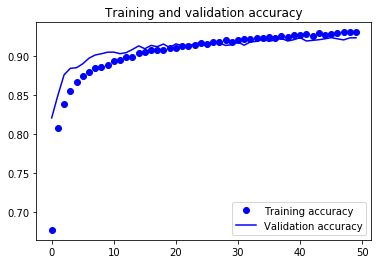

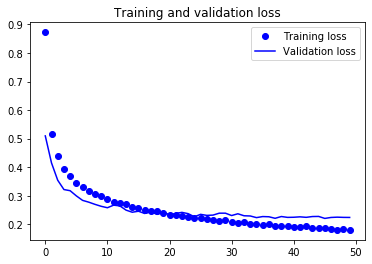

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

#### >>Save the model

In [29]:
model.save('Ass3DL.model')

#### >>Load the testX.pickle file

In [30]:
test_x=pd.read_pickle('testX.pickle')
print(test_x.shape)

(10000, 28, 28)


#### >>Reshape the testX dataset and normalization

In [31]:
test_x=test_x.reshape(test_x.shape[0],img_rows,img_cols,1)
test_x=test_x.astype('float32')
test_x/=255
print('test_x shape',test_x.shape)
print(test_x.shape[0],'test samples')

test_x shape (10000, 28, 28, 1)
10000 test samples


#### >>To predict the classes and save it to test_y

In [32]:
test_y=model.predict_classes([test_x])
print(test_y)

[9 2 1 ... 8 1 5]


#### >>Save the predicted result in pickle file

In [33]:
import pickle
pickle_out=open('Akash_Bhardwaj_testY.pickle','wb')
pickle.dump(test_y,pickle_out)
pickle_out.close()